## Energy Consumption and Prediction Project

### Step1: Data Explorations

### Problem Statement
##### Develop a predictive model to forecast the energy consumption of households based on historical power consumption data, conditions, and

##### demographic information. The goal is to identify trends and help users optimize their energy usage

# Milestone 1

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as anp

### Reading Dataset
##### The file 'hpc.txt' is read with a semicolon (;) separator
##### hpc = household_power_consumption

In [2]:
df = pd.read_csv('hpc.txt',sep=";")

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7040\4060873768.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hpc.txt',sep=";")


##### Datetime: Timestamp of the recorded energy consumption, providing a temporal context for analysis.

##### Global_active_power: Total active power consumed by the household (in kilowatts), indicating overall energy usage.

##### Global_reactive_power: Reactive power (in kilovars) that supports the voltage levels required for the active power to do useful work.

##### Voltage: The electrical potential difference (in volts) of the power supply, influencing how efficiently energy is consumed.

##### Global_intensity: Measure of current (in amperes) flowing in the household, reflecting the demand for electricity.

##### Sub_metering_1: Energy consumption (in watt-hours) for a specific appliance or area, helping to break down overall usage.

##### Sub_metering_2: Energy consumption (in watt-hours) for another appliance or area, providing additional detail on energy distribution.

##### Sub_metering_3: Energy consumption (in watt-hours) for a third appliance or area, allowing for further granularity in energy tracking.

### Understanding Structure of Dataset
#### Display the first few rows of the dataset

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Observation
##### It displayed first 5 rows

####  Display the last few rows to check if the data is consistent

In [4]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### Observation
##### It displayed last 5 rows

#### 'describe()' gives a statistical summary for numerical columns: count, mean, min, max, std deviation

In [5]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


#### This returns the number of rows and columns

In [6]:
df.shape

(2075259, 9)

### Observation
##### Dataset has 9 Colums and 2075259 Rows

#### 'describe(include=object)' gives information about non-numeric columns, such as counts, unique values,top and frequencies

In [7]:
df.describe(include = object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


### Observation
##### There are some unique values and missing values

#### 'nunique()' returns the number of unique values in each column

In [8]:
df.nunique()

Date                     1442
Time                     1440
Global_active_power      6534
Global_reactive_power     896
Voltage                  5168
Global_intensity          377
Sub_metering_1            153
Sub_metering_2            145
Sub_metering_3             32
dtype: int64

#### 'info()' provides details about column names, data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Obserbation
##### The dataset consists of multiple columns, including both numerical and object types

##### To get accurate Null values , first we have to convert columns which are in string to numericals

##### Combined 'Date' and 'Time' columns to create a new 'Datetime' column

#### I combined date and time colums because -

#####      Use time-based indexing to easily filter or retrieve data from a specific time range

######     Calculate time intervals between different records

In [10]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)

##### Columns that represent numerical values but stored as strings are converted using 'to_numeric'
##### 'errors=coerce' converts non-convertible values to NaN

In [11]:
cols_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in cols_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2075259
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2008-12-06 07:12:59.999994112
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


### Observation
##### All Datatypes changed to float and datetime colums create with datetime datatype

### Checking for null values
#### 'isnull().any()' checks if there are any null values

In [14]:
df.isnull().any()

Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
Datetime                 False
dtype: bool

### Observation
##### We have null values in every colums except datetime column

#### Calculate the percentage of null values in each column
##### This helps assess how much data is missing

In [15]:
(df.isnull().sum() / len(df)) * 100

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
Datetime                 0.000000
dtype: float64

### Observation
##### Every column missing 1.25% of data

##### We can deal with null values by fill missing values with the mean ,

##### median of the column or delete row which have null values

##### I am filling the mean of the column

In [16]:
null_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

for col in null_columns:
    df[col].fillna(df[col].mean(), inplace=True)

#### Recheck for null values after handling

In [17]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

### Observation
##### There are no null values

# Milestone 2

# 1. Frame questions
#### Question 1: What is the trend of 'Global_active_power' over time?
#### Question 2: What is the relationship between 'Global_active_power' and 'Voltage'?
#### Question 3: How does 'Global_intensity' vary over different hours of the day?
#### Question 4: What is the daily average of 'Sub_metering' values?
#### Question 5: How does 'Global_reactive_power' vary on holidays vs non-holidays?

# Data Visualization

### What is the trend of 'Global_active_power' over time?

##### This code creates a histogram to show the distribution of "Global Active Power" in the dataset. It divides the data into 50 bins and adds a

##### smooth curve on top to highlight the overall pattern. The plot is labeled with the title and axis descriptions, and it’s displayed on the screen.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


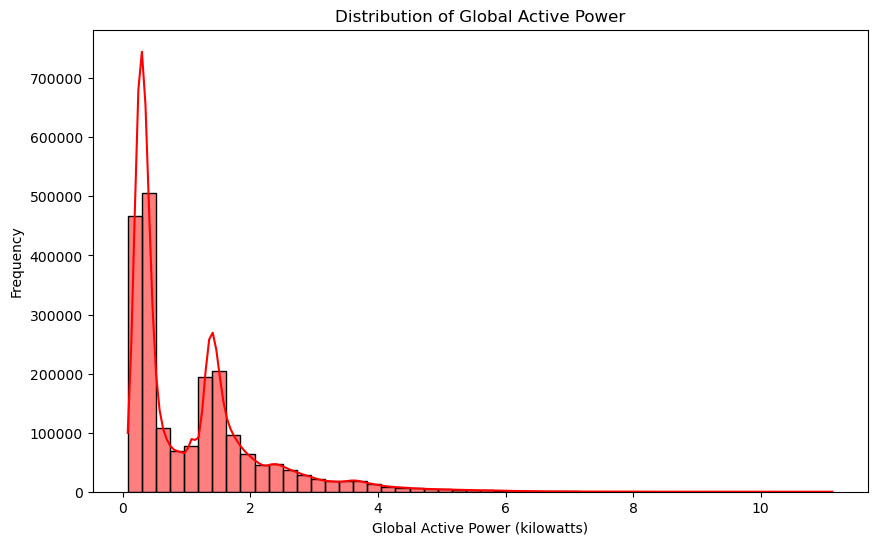

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of 'Global_active_power'
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_active_power'], bins=50, kde=True, color='red')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()


#### Observation:
##### I noticed that most power usage is clustered at the lower end, which tells me that people generally use lower amounts of power

### What is the relationship between 'Global_active_power' and 'Voltage'?

##### This code groups the "Voltage" values into 10 equal ranges and calculates the average "Global Active Power" for each range. It then creates a bar

##### chart with the voltage ranges on the x-axis and the average power on the y-axis, displaying the relationship between voltage levels and power usage.

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7040\1596717811.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='violet')


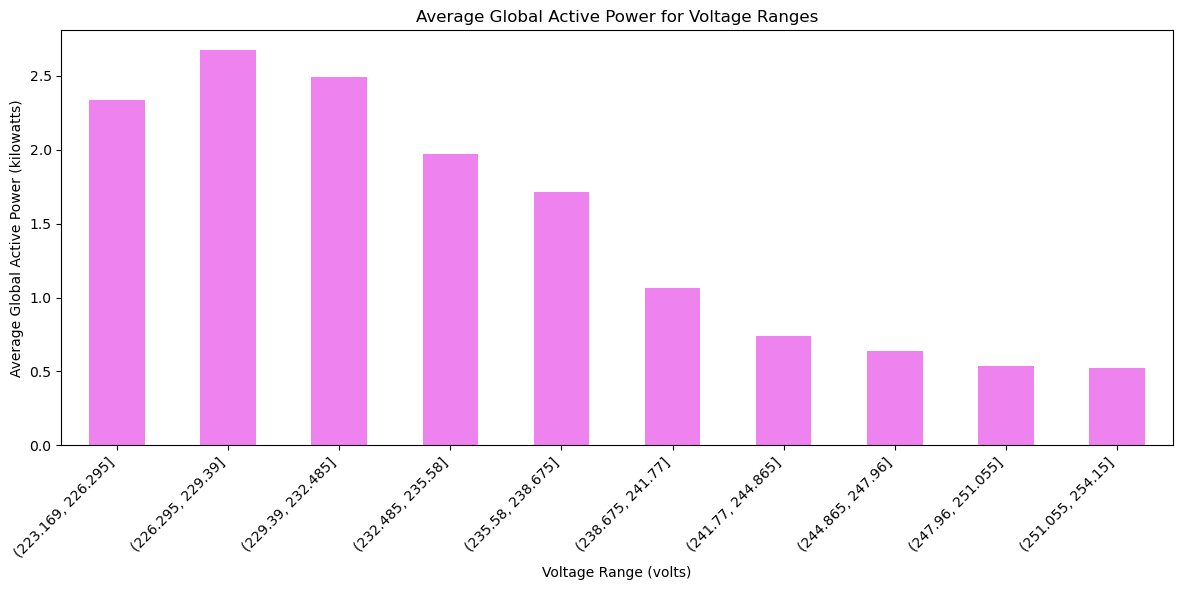

In [19]:
# Bar chart of 'Global_active_power' grouped by 'Voltage' ranges
df['Voltage_range'] = pd.cut(df['Voltage'], bins=10)
plt.figure(figsize=(12, 6))
df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='violet')
plt.xticks(rotation=45, ha='right')
plt.title('Average Global Active Power for Voltage Ranges')
plt.xlabel('Voltage Range (volts)')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.tight_layout()
plt.show()

### Observation:
#### I found that the average global active power changes depending on voltage ranges, which helps me understand how power usage is influenced by different voltage levels.

### What is the daily average of 'Sub_metering' values?

##### This code creates a line plot to visualize the energy consumption from three sub-meters ('Sub_metering_1', 'Sub_metering_2', and

##### 'Sub_metering_3') over time. It plots each sub-meter's data against the Datetime column, with labels for each sub-meter and a legend to

##### differentiate them

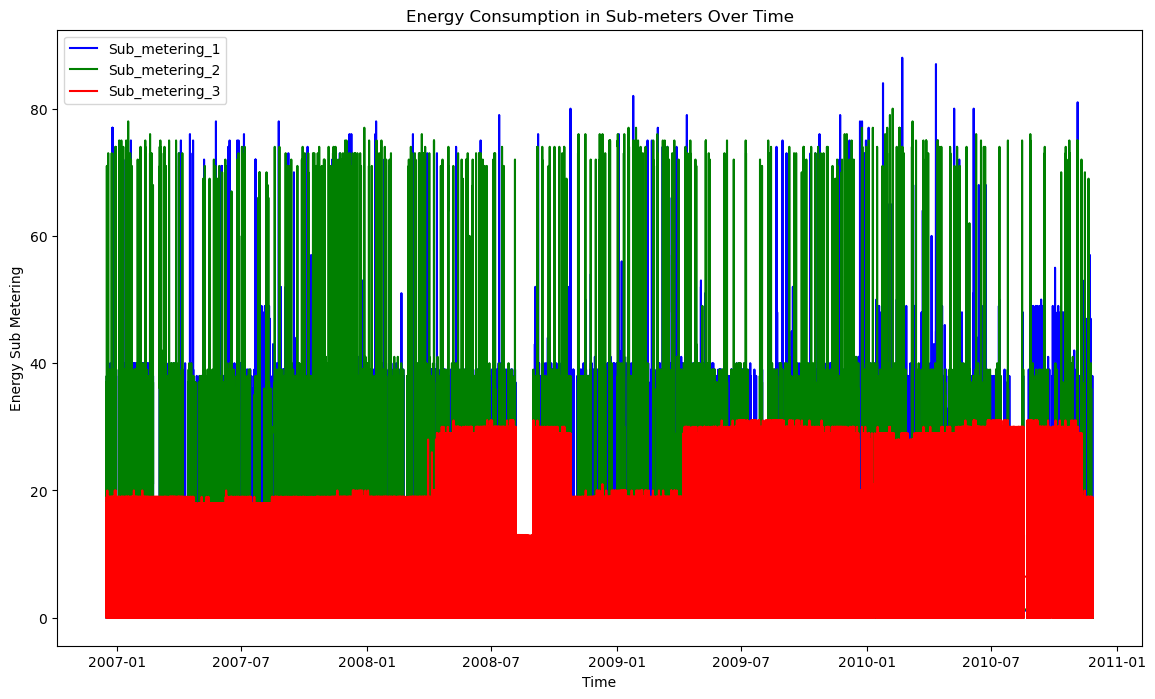

In [20]:
# 3. Line plot for 'Sub_metering_1', 'Sub_metering_2', and 'Sub_metering_3' over time
plt.figure(figsize=(14, 8))
plt.plot(df['Datetime'], df['Sub_metering_1'], label='Sub_metering_1', color='blue')
plt.plot(df['Datetime'], df['Sub_metering_2'], label='Sub_metering_2', color='green')
plt.plot(df['Datetime'], df['Sub_metering_3'], label='Sub_metering_3', color='red')
plt.title('Energy Consumption in Sub-meters Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Sub Metering')
plt.legend()
plt.show()

### Observation:

#### Observing the energy consumption in the three sub-meters over time shows me clear trends and differences in how each sub-meter is used.

### How does 'Global_intensity' vary over different hours of the day?

##### This code generates a line plot to display how "Global_intensity" changes over time. It uses the Datetime column for the x-axis and the

##### "Global_intensity" for the y-axis, with the line colored purple.

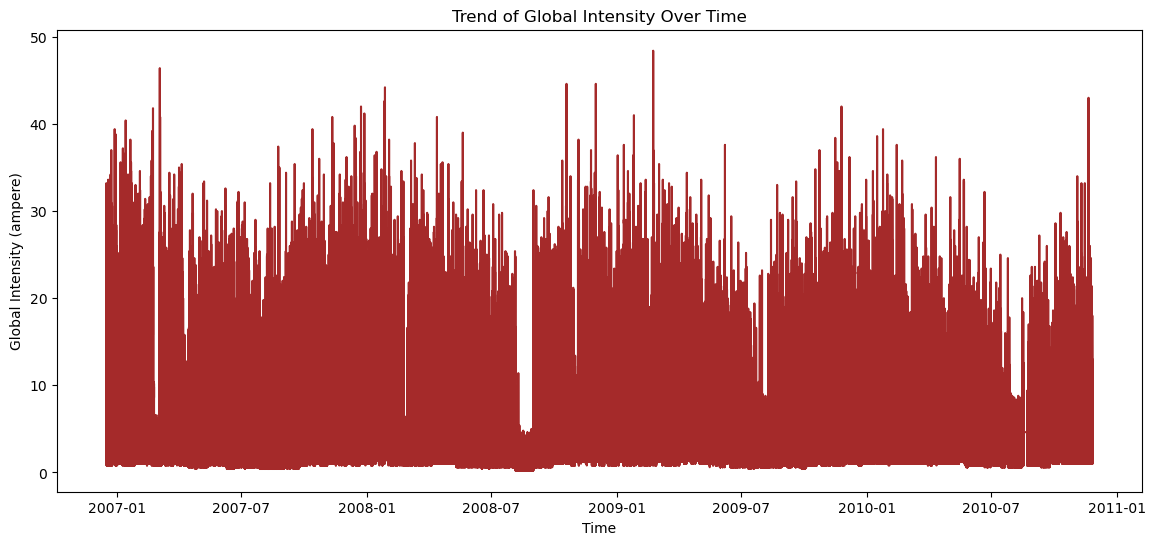

In [21]:
# Trend of 'Global_intensity' over time
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['Global_intensity'], color='brown')
plt.title('Trend of Global Intensity Over Time')
plt.xlabel('Time')
plt.ylabel('Global Intensity (ampere)')
plt.show()

### Exploring Correlations Between Power and Voltage Variables

##### creates a pair plot for selected columns ('Global_active_power', 'Global_reactive_power', 'Voltage', and 'Global_intensity') to observe the

##### relationships between them. It plots scatter plots for each pair of variables and histograms for individual variables. The dropna() method is

##### used to remove any missing values

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

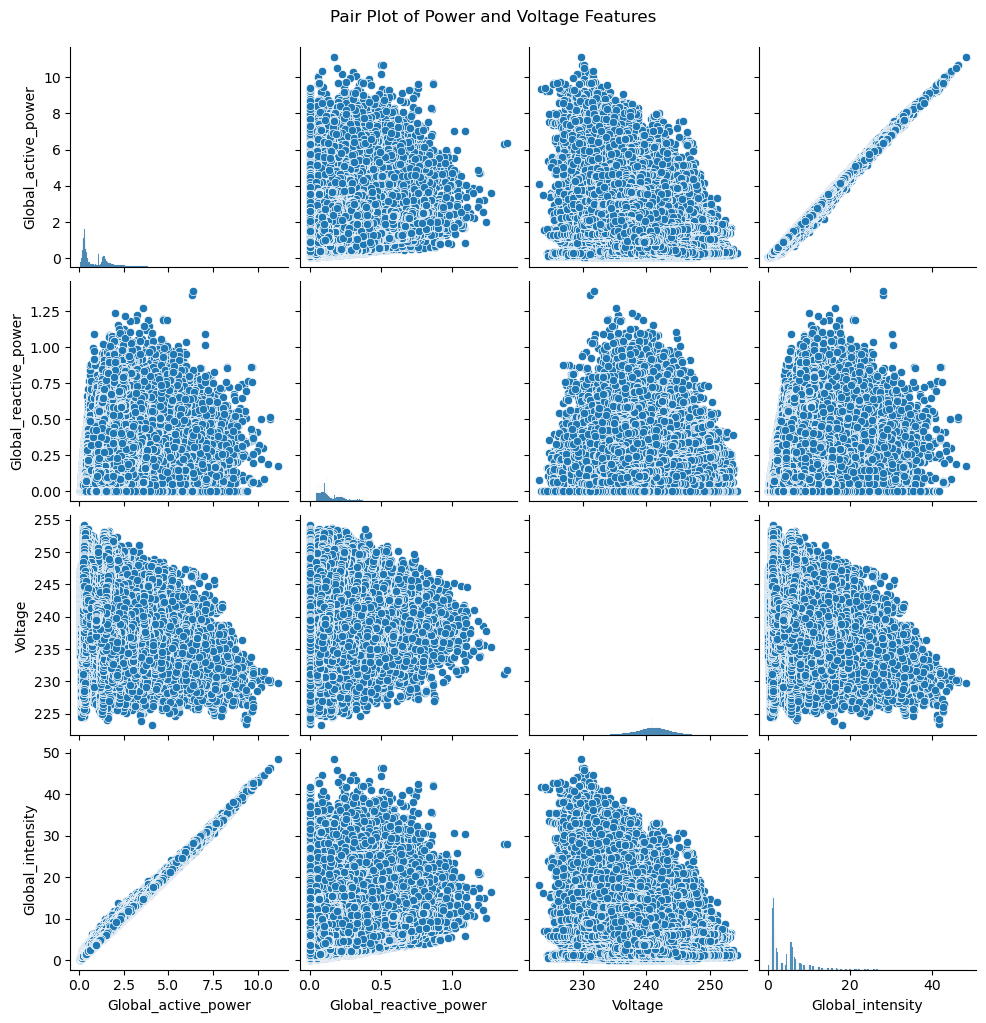

In [22]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
sns.pairplot(df[cols].dropna())
plt.suptitle('Pair Plot of Power and Voltage Features', y=1.02)
plt.show()

### Observation:
#### Looking at the pair plot, I can see some correlations between power and voltage features, like potential relationships between active power, reactive power, and voltage

## Extract date and time components into tuples

##### df['Date']: Extracts the year, month, and day from the Datetime column and stores it as a tuple (year, month, day).

##### df['Time']: Extracts the hour and minute from the Datetime column and stores it as a tuple (hour, minute).

In [23]:

df['Date'] = df['Datetime'].apply(lambda dt: (dt.year, dt.month, dt.day))
df['Time'] = df['Datetime'].apply(lambda dt: (dt.hour, dt.minute))


#### Check the first few rows to verify the new columns

In [24]:

print(df[['Datetime', 'Date', 'Time']].head())

             Datetime            Date      Time
0 2006-12-16 17:24:00  (2006, 12, 16)  (17, 24)
1 2006-12-16 17:25:00  (2006, 12, 16)  (17, 25)
2 2006-12-16 17:26:00  (2006, 12, 16)  (17, 26)
3 2006-12-16 17:27:00  (2006, 12, 16)  (17, 27)
4 2006-12-16 17:28:00  (2006, 12, 16)  (17, 28)


### Installing required libraries

In [25]:
!pip install holidays

Defaulting to user installation because normal site-packages is not writeable


## Finding whether the day is a holiday or not

##### Function to check if the date is a holiday

##### Convert the tuple to a date object

##### Converting tuple (year, month, day) to date object

##### Apply the function to the 'Date' column (which is in (year, month, day) format)

##### Check the first few rows to verify the new column

In [26]:

import holidays
from datetime import date
holiday_list = holidays.India(years=[2006, 2007, 2008, 2009, 2010])

def check_if_holiday(date_tuple):
    holiday_date = date(*date_tuple)
    return 1 if holiday_date in holiday_list else 0

df['Holiday'] = df['Date'].apply(lambda x: check_if_holiday((x[0], x[1], x[2])))
print(df[['Datetime', 'Date', 'Holiday']])

                   Datetime            Date  Holiday
0       2006-12-16 17:24:00  (2006, 12, 16)        0
1       2006-12-16 17:25:00  (2006, 12, 16)        0
2       2006-12-16 17:26:00  (2006, 12, 16)        0
3       2006-12-16 17:27:00  (2006, 12, 16)        0
4       2006-12-16 17:28:00  (2006, 12, 16)        0
...                     ...             ...      ...
2075254 2010-11-26 20:58:00  (2010, 11, 26)        0
2075255 2010-11-26 20:59:00  (2010, 11, 26)        0
2075256 2010-11-26 21:00:00  (2010, 11, 26)        0
2075257 2010-11-26 21:01:00  (2010, 11, 26)        0
2075258 2010-11-26 21:02:00  (2010, 11, 26)        0

[2075259 rows x 3 columns]


### Observation :

#### I created a new column called 'holiday' with values of 0 and 1 to easily separate holidays from regular days.

### Printing holidays and non holiday count

In [27]:
# Count of holidays (1) and non-holidays (0)
holiday_counts = df['Holiday'].value_counts()

# Print the counts
print("Holiday counts:")
print(f"Holiday (1): {holiday_counts.get(1, 0)}")
print(f"Non-Holiday (0): {holiday_counts.get(0, 0)}")

Holiday counts:
Holiday (1): 105120
Non-Holiday (0): 1970139


### Observation :

#### It turns out that nearly 95% of the days are non-holidays, with only about 5% being holidays.

## Find if the there is sunlight during the time given in the dataset

##### Extracting hour from the time tuple

##### Assuming 'time' is a tuple (hour, minute)

##### Sunlight is present between 06:00 and 18:00

##### Apply the function to the 'Time' column and create 'Sunlight' column

##### Print the first few rows to verify

In [28]:

def check_sunlight(time):
    hour = time[0]
    return 1 if 6 <= hour < 18 else 0

df['Sunlight'] = df['Time'].apply(check_sunlight)

print(df[['Datetime', 'Time', 'Sunlight']].head())


             Datetime      Time  Sunlight
0 2006-12-16 17:24:00  (17, 24)         1
1 2006-12-16 17:25:00  (17, 25)         1
2 2006-12-16 17:26:00  (17, 26)         1
3 2006-12-16 17:27:00  (17, 27)         1
4 2006-12-16 17:28:00  (17, 28)         1


### Observation :

#### I also made a 'sunlight' column with 0 and 1 values, so I can clearly separate data

#### for times with and without sunlight.

##### filters rows based on the "Sunlight" column, where rows with Sunlight == 1 are stored in sunlight_df, and rows with Sunlight == 0 are stored in

##### no_sunlight_df. It then displays the first few rows (including only Datetime, Time, and Sunlight columns) for each group.

In [29]:

sunlight_df = df[df['Sunlight'] == 1]
no_sunlight_df = df[df['Sunlight'] == 0]

print("Rows with Sunlight:")
print(sunlight_df[['Datetime', 'Time', 'Sunlight']].head())

print("\nRows with No Sunlight:")
print(no_sunlight_df[['Datetime', 'Time', 'Sunlight']].head())


Rows with Sunlight:
             Datetime      Time  Sunlight
0 2006-12-16 17:24:00  (17, 24)         1
1 2006-12-16 17:25:00  (17, 25)         1
2 2006-12-16 17:26:00  (17, 26)         1
3 2006-12-16 17:27:00  (17, 27)         1
4 2006-12-16 17:28:00  (17, 28)         1

Rows with No Sunlight:
              Datetime     Time  Sunlight
36 2006-12-16 18:00:00  (18, 0)         0
37 2006-12-16 18:01:00  (18, 1)         0
38 2006-12-16 18:02:00  (18, 2)         0
39 2006-12-16 18:03:00  (18, 3)         0
40 2006-12-16 18:04:00  (18, 4)         0


### Observation :

#### This new 'sunlight' column lets me easily compare data between times when there’s sunlight and when there isn’t.

## Visualizing the Sunlight and Holidays Distribution

##### This code generates two bar plots: one for the distribution of sunlight (Sunlight
##### column) and one for holidays (Holiday column). Each plot shows

##### the count of occurrences for values 0 and 1, where 0 means "No Sunlight"/"Not

##### Holiday," and 1 means "Sunlight"/"Holiday."

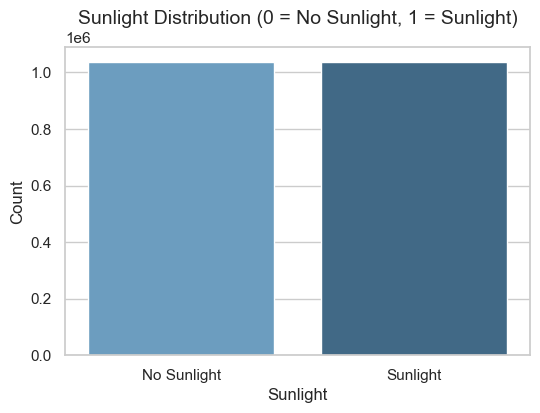

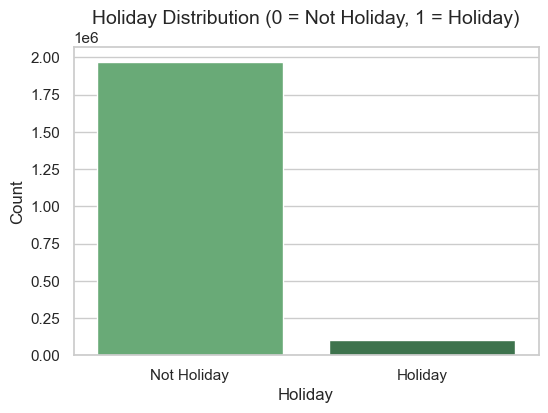

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Sunlight Distribution
plt.figure(figsize=(6, 4))
sunlight_counts = df['Sunlight'].value_counts()
sns.barplot(x=sunlight_counts.index, y=sunlight_counts.values, palette="Blues_d")
plt.title('Sunlight Distribution (0 = No Sunlight, 1 = Sunlight)', fontsize=14)
plt.xlabel('Sunlight', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Sunlight', 'Sunlight'])
plt.show()

# Holiday Distribution
plt.figure(figsize=(6, 4))
holiday_counts = df['Holiday'].value_counts()
sns.barplot(x=holiday_counts.index, y=holiday_counts.values, palette="Greens_d")
plt.title('Holiday Distribution (0 = Not Holiday, 1 = Holiday)', fontsize=14)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])
plt.show()

### Observations:

##### The sunlight distribution shows me the count of instances with and without sunlight, while the holiday distribution highlights the number of holiday days versus regular days.

# Milestone 3

## Spliting Data

In [31]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df.drop(['Global_active_power', 'Datetime', 'Date', 'Time', 'Holiday', 'Sunlight'], axis=1)
y = df['Global_active_power']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Observation:

##### I observed that some columns have categorial data , so converting into numerical data

### Convert categorical columns to numeric using one-hot encoding

In [32]:
# Convert categorical columns to numeric using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns in case of any discrepancies between train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)




## Implement and Evaluate Linear Regression model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = linear_model.predict(X_test)

# Calculate RMSE and R²
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R²: {r2_linear:.2f}")


Linear Regression:
RMSE: 0.04
R²: 1.00


### Observation:

##### Linear Regression gave the best performance with an RMSE of 0.04 and an R² of 1.00, meaning it fit the data perfectly.

## Implement and Evaluate Lasso Regression Model

In [34]:
from sklearn.linear_model import Lasso

# Initialize and fit the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate RMSE and R²
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")



Lasso Regression:
RMSE: 0.05
R²: 1.00


### Observation:

##### Lasso Regression performed slightly worse, with an RMSE of 0.05. It also had an R² of 1.00, but the feature selection might have caused a minor

##### loss in accuracy compared to Ridge and Linear.

## Implement and Evaluate Ridge Regression Model

In [35]:
from sklearn.linear_model import Ridge

# Initialize and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)

# Predict on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate RMSE and R²
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")



Ridge Regression:
RMSE: 0.04
R²: 1.00


### Observation:

##### Ridge Regression had almost the same RMSE (0.04) and R² (1.00), which shows the regularization didn’t affect its performance much, and it handled

##### the data well.

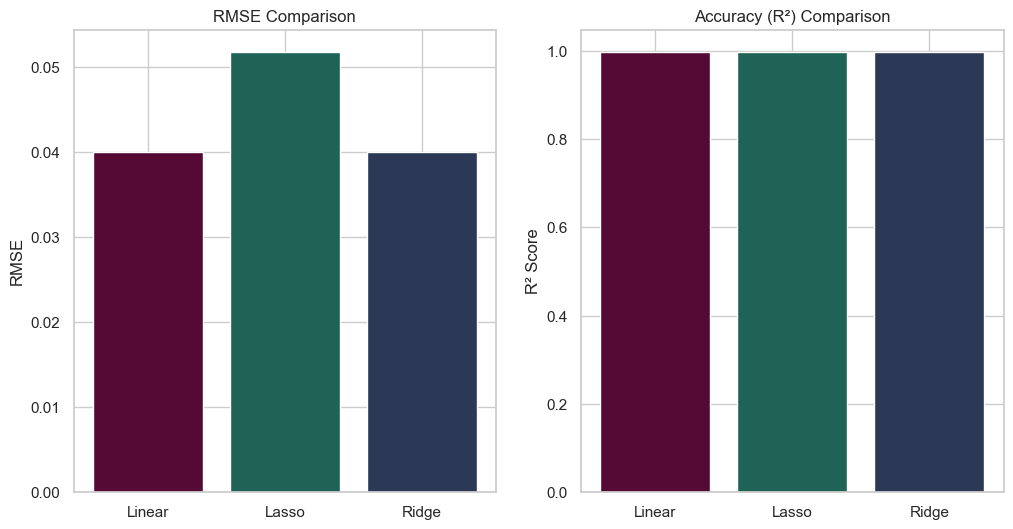

In [36]:
# Plot RMSE comparison
plt.figure(figsize=(12, 6))

# RMSE Plot
plt.subplot(1, 2, 1)
plt.bar(['Linear', 'Lasso', 'Ridge'], [rmse_linear, rmse_lasso, rmse_ridge], color=['#550A35', '#1F6357', '#2B3856'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

# R² Plot
plt.subplot(1, 2, 2)
plt.bar(['Linear', 'Lasso', 'Ridge'], [r2_linear, r2_lasso, r2_ridge], color=['#550A35', '#1F6357', '#2B3856'])
plt.ylabel('R² Score')
plt.title('Accuracy (R²) Comparison')

plt.show()


### Observation:
##### In the RMSE plot, Ridge and Linear Regression show almost identical performance (RMSE: 0.04), indicating they fit the data well. Lasso has a

##### slightly higher RMSE (0.05), likely due to its feature selection.

##### In the R² plot, all models have values close to 1.00, meaning they explain almost all the variance in the data. This suggests the data is well-suited for linear models.

##### Overall, Ridge and Linear Regression perform almost the same, while Lasso performs slightly worse due to its complexity reduction.

## Why certain models have good accuracy and others don't

### Linear Relationships in Data
##### The strong linear relationships allow Linear, Ridge, and Lasso models to capture patterns effectively with minimal complexity.

### Regularization Impact
##### Ridge Regression: Stabilizes the model by penalizing large coefficients, slightly improving performance.
##### Lasso Regression: Performs similarly, but with a marginally higher RMSE (0.05) due to its tendency to shrink some coefficients to zero.

### Low Complexity and High Predictive Power
##### Low noise and high feature relevance allow these linear models to achieve high accuracy without needing complex non-linear approaches.

# Milestone 4

In [37]:
pip install prophet statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# ARIMA Model for Energy Consumption Forecasting

#### Aggregate daily energy consumption (Global_active_power).

#### Split data: 80% for training, 20% for testing.

#### Train ARIMA with parameters (p=2, d=1, q=2)

#### Use ARIMA to predict for the test period

#### Visualize training data, test data, and predictions to assess performance.

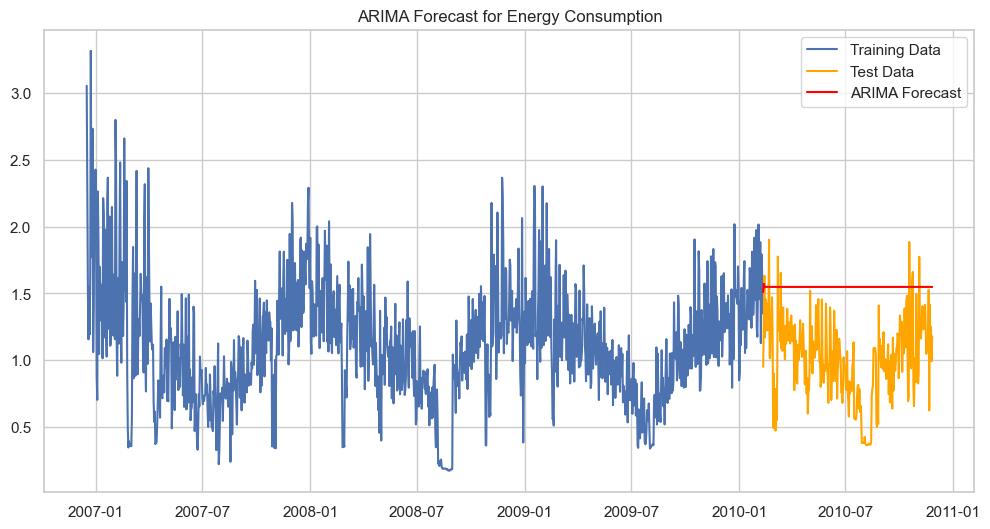

In [38]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

daily_power = df.resample('D', on='Datetime')['Global_active_power'].mean()

train_size = int(len(daily_power) * 0.8)
train, test = daily_power[:train_size], daily_power[train_size:]

arima_model = ARIMA(train, order=(2, 1, 2))
arima_fit = arima_model.fit()


forecast = arima_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Test Data", color="orange")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast for Energy Consumption")
plt.show()


# Observation:

#### ARIMA works well for time series data that shows stationarity after differencing, and it captures patterns based on past values and errors.

# Mathematics Behind ARIMA

AutoRegressive (AR):

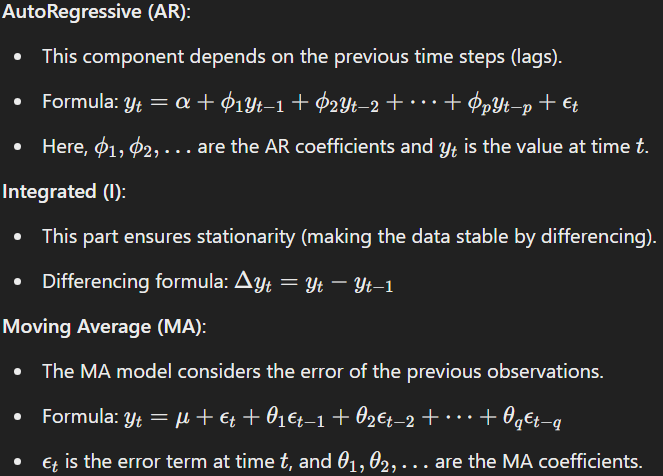

# Energy Consumption Forecasting with Prophet

##### The dataset is reformatted for Prophet (ds for dates, y for values) and split into training (80%) and testing (20%).

##### A Prophet model is configured with yearly, weekly, and daily seasonality, then trained on the training data.

##### Forecasts are generated for 7 days (weekly), 30 days (monthly), and 365 days (yearly) into the future.

#### Forecasts for each time frame are plotted to visualize predicted energy consumption trends.

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

prophet_df = df[['Datetime', 'Global_active_power']].rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'})

# Split data into training and testing sets (80%-20% split)
train_size = int(len(prophet_df) * 0.8)
train_df = prophet_df[:train_size]
test_df = prophet_df[train_size:]


model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)


model.fit(train_df)


future_dates_weekly = model.make_future_dataframe(periods=7, freq='D')  # 7-day forecast
predictions_weekly = model.predict(future_dates_weekly)


future_dates_monthly = model.make_future_dataframe(periods=30, freq='D')  # 30-day forecast
predictions_monthly = model.predict(future_dates_monthly)


future_dates_yearly = model.make_future_dataframe(periods=365, freq='D')  # 1-year forecast
predictions_yearly = model.predict(future_dates_yearly)


# Weekly Forecast
plt.figure(figsize=(10, 6))
model.plot(predictions_weekly)
plt.title("Weekly Forecast")
plt.xlabel("Date")
plt.ylabel("Global Active Power")
plt.show()

# Monthly Forecast
plt.figure(figsize=(10, 6))
model.plot(predictions_monthly)
plt.title("Monthly Forecast")
plt.xlabel("Date")
plt.ylabel("Global Active Power")
plt.show()

# Yearly Forecast
plt.figure(figsize=(10, 6))
model.plot(predictions_yearly)
plt.title("Yearly Forecast")
plt.xlabel("Date")
plt.ylabel("Global Active Power")
plt.show()

# Observation:

#### Trend: Indicates long-term growth or decline in energy consumption.

#### Seasonality:
     Yearly: Captures recurring patterns over the years.
     Daily: Reflects diurnal energy usage.

#### Patterns: Peaks during work hours, dips during off-hours.



In [ ]:

model.plot_components(predictions_yearly)
plt.show()



# Observation:

#### trend line represents the long-term direction of the energy consumption (either increasing, decreasing, or stable).

#### The weekly plot shows energy consumption patterns for each day of the week.

#### This captures annual fluctuations in energy consumption, such as peaks in summer or winter.

#### The daily seasonality plot shows consumption variations across different hours of the day.

# Energy Consumption Analysis

### Daily Consumption

In [39]:
daily_max_time = df.groupby(df['Datetime'].dt.hour)['Global_active_power'].mean().idxmax()
print(f"Daily peak energy consumption occurs at {daily_max_time}:00.")

Daily peak energy consumption occurs at 20:00.


### Weekly Consumption

In [40]:
weekly_max_time = df.groupby(df['Datetime'].dt.weekday)['Global_active_power'].mean().idxmax()
print(f"Weekly peak energy consumption occurs on {['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][weekly_max_time]}.")


Weekly peak energy consumption occurs on Saturday.


### Monthly Consumption

In [41]:
monthly_max_time = df.groupby(df['Datetime'].dt.month)['Global_active_power'].mean().idxmax()
print(f"Monthly peak energy consumption occurs in {monthly_max_time}.")

Monthly peak energy consumption occurs in 12.


### Yearly Consumption

In [42]:
yearly_max_time = df.groupby(df['Datetime'].dt.year)['Global_active_power'].mean().idxmax()
print(f"Yearly peak energy consumption occurs in {yearly_max_time}.")


Yearly peak energy consumption occurs in 2006.


# Observation

#### Peak usage at evening hours (likely due to residential use and lighting needs).

#### Peaks during weekdays, possibly due to industrial and office usage

#### Peaks during colder months (heating) or summer (cooling demands).

#### Gradual rise indicates increasing population or industrialization.


In [44]:
import joblib

# Save the models
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(ridge_model, 'ridge_model.pkl')
joblib.dump(arima_model, 'arima_model.pkl')
feature_names = df.drop('Global_active_power', axis=1).columns
joblib.dump(feature_names, 'feature_names.pkl')

print("Models and features saved successfully.")


Models and features saved successfully.
